In [11]:
from SALib.analyze import sobol

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 20})

In [12]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    indices = s['S' + i]
    errors = s['S' + i + '_conf']
    plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

In [13]:
# We define our variables and bounds
problem = {
    'num_vars': 5,
    'names': ['jail_sentence', 'criminal_risk_radius', 'cop_catch_radius', 'criminal_risk_aversion', 'criminal_disconnectivity'],
    'bounds': [[0, 20], [1, 10], [1, 10], [0, 500], [0, 100]]
}

In [14]:
df1 = pd.read_csv('./sensitivity_analysis_output_2022-02-04.csv')
df1.drop(df1.columns[0],axis=1,inplace=True)

df2 = pd.read_csv('./sensitivity_analysis_output_2022-02-05.csv')
df2.drop(df2.columns[0],axis=1,inplace=True)

df3 = pd.read_csv('./sensitivity_analysis_output_2022-02-06.csv')
df3.drop(df3.columns[0],axis=1,inplace=True)

df4 = pd.read_csv('./sensitivity_analysis_output_2022-02-07.csv')
df4.drop(df4.columns[0],axis=1,inplace=True)

df5 = pd.read_csv('./sensitivity_analysis_output_2022-02-08.csv')
df5.drop(df5.columns[0],axis=1,inplace=True)

df6 = pd.read_csv('./sensitivity_analysis_output_ONE.csv')
df6.drop(df1.columns[0],axis=1,inplace=True)

df7 = pd.read_csv('./sensitivity_analysis_output_TWO.csv')
df7.drop(df2.columns[0],axis=1,inplace=True)

df8 = pd.read_csv('./sensitivity_analysis_output_THREE.csv')
df8.drop(df3.columns[0],axis=1,inplace=True)

df9 = pd.read_csv('./sensitivity_analysis_output_FOUR.csv')
df9.drop(df4.columns[0],axis=1,inplace=True)

df10 = pd.read_csv('./sensitivity_analysis_output_FIVE.csv')
df10.drop(df5.columns[0],axis=1,inplace=True)

df11 = pd.read_csv('./sensitivity_analysis_output_SIX.csv')
df11.drop(df4.columns[0],axis=1,inplace=True)

df12 = pd.read_csv('./sensitivity_analysis_output_SEVEN.csv')
df12.drop(df5.columns[0],axis=1,inplace=True)



In [15]:
data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12],ignore_index=True)

In [16]:
data = data.drop('Run', 1)

In [17]:
print(data)

       jail_sentence  criminal_risk_radius  cop_catch_radius  \
0                0.0                     3                10   
1               11.0                     3                10   
2                0.0                     7                10   
3                0.0                     3                 9   
4                0.0                     3                10   
...              ...                   ...               ...   
41995            NaN                     3                 8   
41996            NaN                     9                 6   
41997            NaN                     9                 8   
41998            NaN                     9                 8   
41999            NaN                     3                 6   

       criminal_risk_aversion  criminal_disconnectivity   Centrum  \
0                         496                        46  4.079550   
1                         496                        46  2.244050   
2                       

In [18]:
Si_crimes = sobol.analyze(problem, data['Total crimes'].values, calc_second_order=False, print_to_console=True)
Si_jail = sobol.analyze(problem, data['Criminals in jail'].values, calc_second_order=False, print_to_console=True)
Si_centrum = sobol.analyze(problem, data['Centrum'].values, calc_second_order=False, print_to_console=True)
Si_noord = sobol.analyze(problem, data['Noord'].values, calc_second_order=False, print_to_console=True)
Si_west = sobol.analyze(problem, data['West'].values, calc_second_order=False, print_to_console=True)
Si_zuid = sobol.analyze(problem, data['Zuid'].values, calc_second_order=False, print_to_console=True)
Si_zuidoost = sobol.analyze(problem, data['Zuidoost'].values, calc_second_order=False, print_to_console=True)
Si_oost = sobol.analyze(problem, data['Oost'].values, calc_second_order=False, print_to_console=True)
Si_nieuw_west = sobol.analyze(problem, data['Nieuw-West'].values, calc_second_order=False, print_to_console=True)

                                ST   ST_conf
jail_sentence             0.798593  0.024266
criminal_risk_radius      0.867752  0.031785
cop_catch_radius          0.887317  0.033916
criminal_risk_aversion    0.828953  0.029313
criminal_disconnectivity  0.891481  0.030208
                                S1   S1_conf
jail_sentence             0.009826  0.036954
criminal_risk_radius     -0.006810  0.035798
cop_catch_radius         -0.111269  0.038886
criminal_risk_aversion   -0.050688  0.036117
criminal_disconnectivity  0.017726  0.034970
                                ST   ST_conf
jail_sentence             0.885325  0.027184
criminal_risk_radius      0.862799  0.030269
cop_catch_radius          0.871345  0.029713
criminal_risk_aversion    0.844369  0.027169
criminal_disconnectivity  0.886154  0.030368
                                S1   S1_conf
jail_sentence             0.014961  0.036482
criminal_risk_radius     -0.068846  0.031037
cop_catch_radius         -0.076764  0.037687
criminal_r

Si_crimes


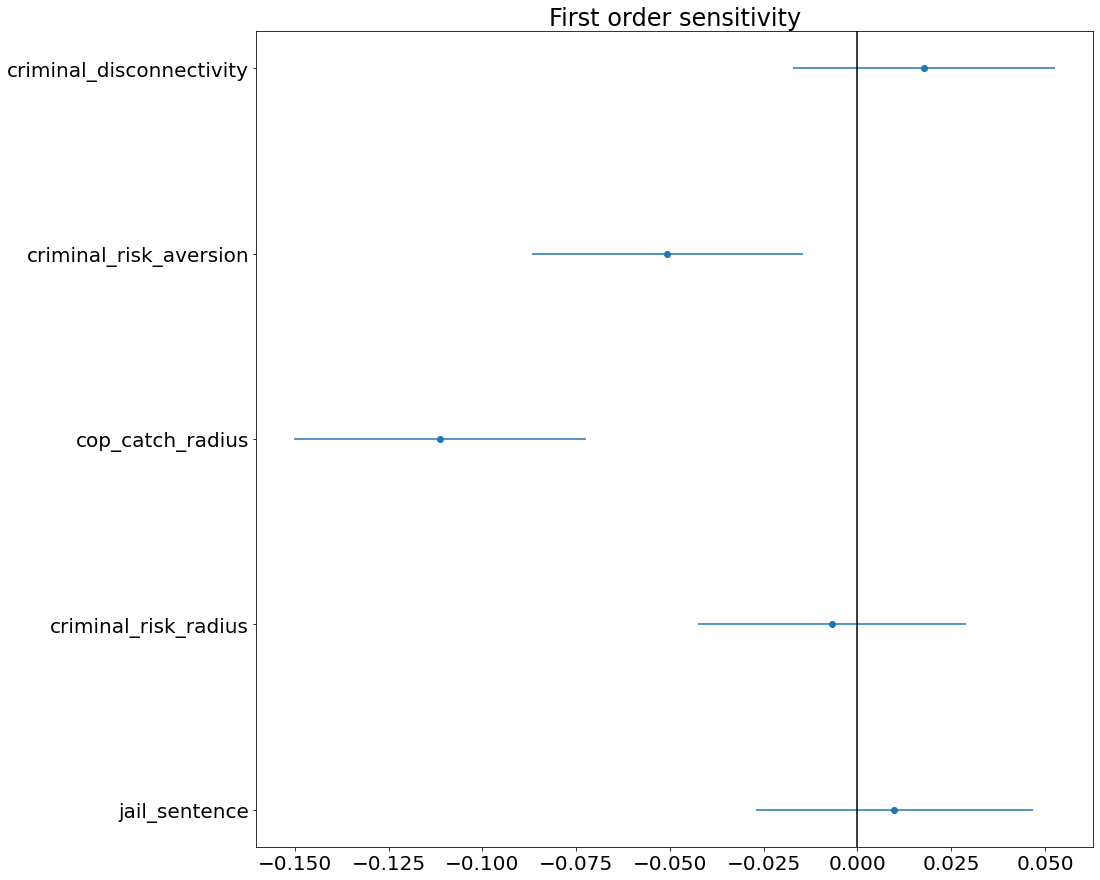

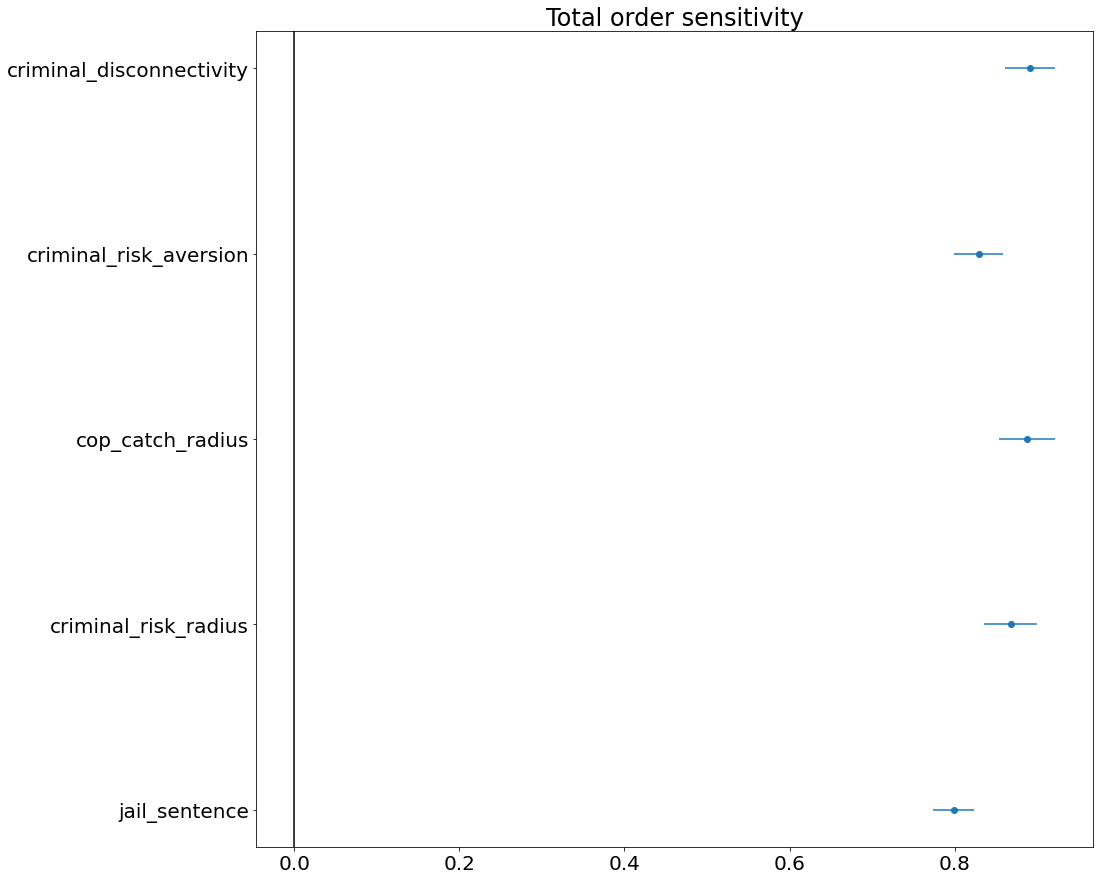

Si_jail


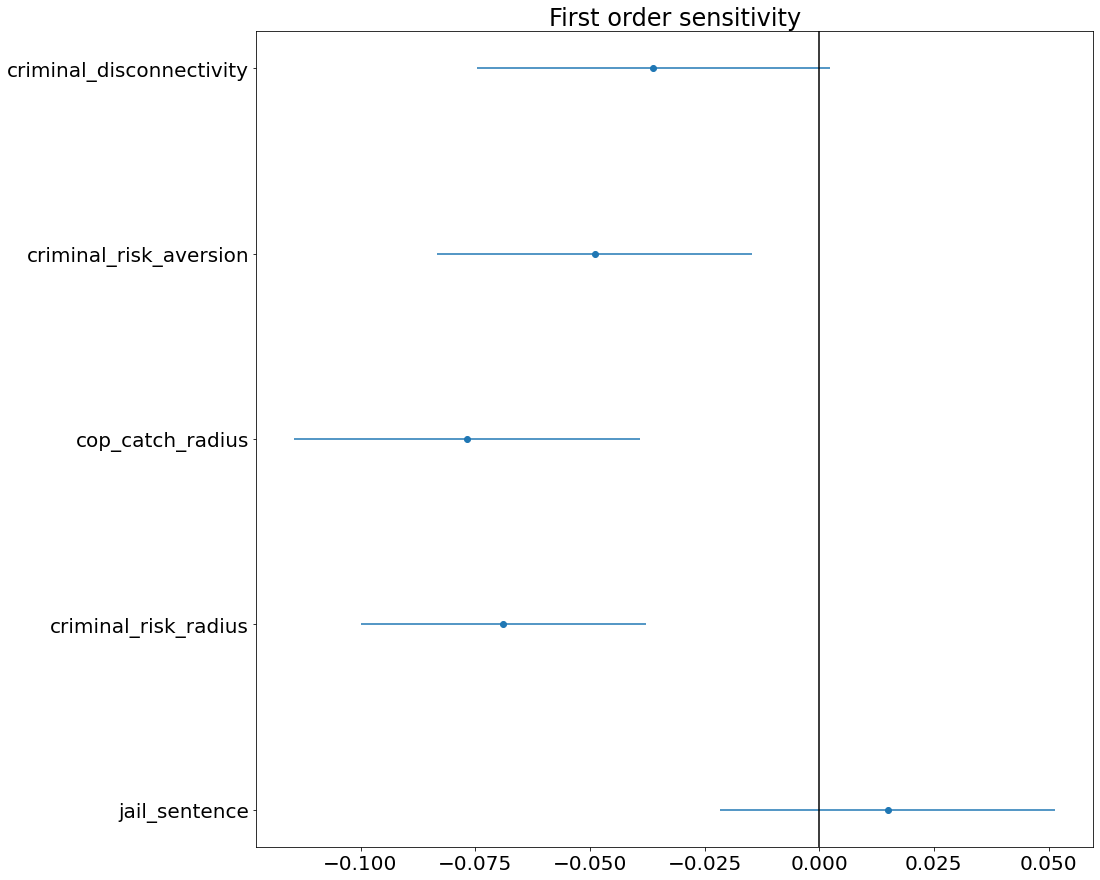

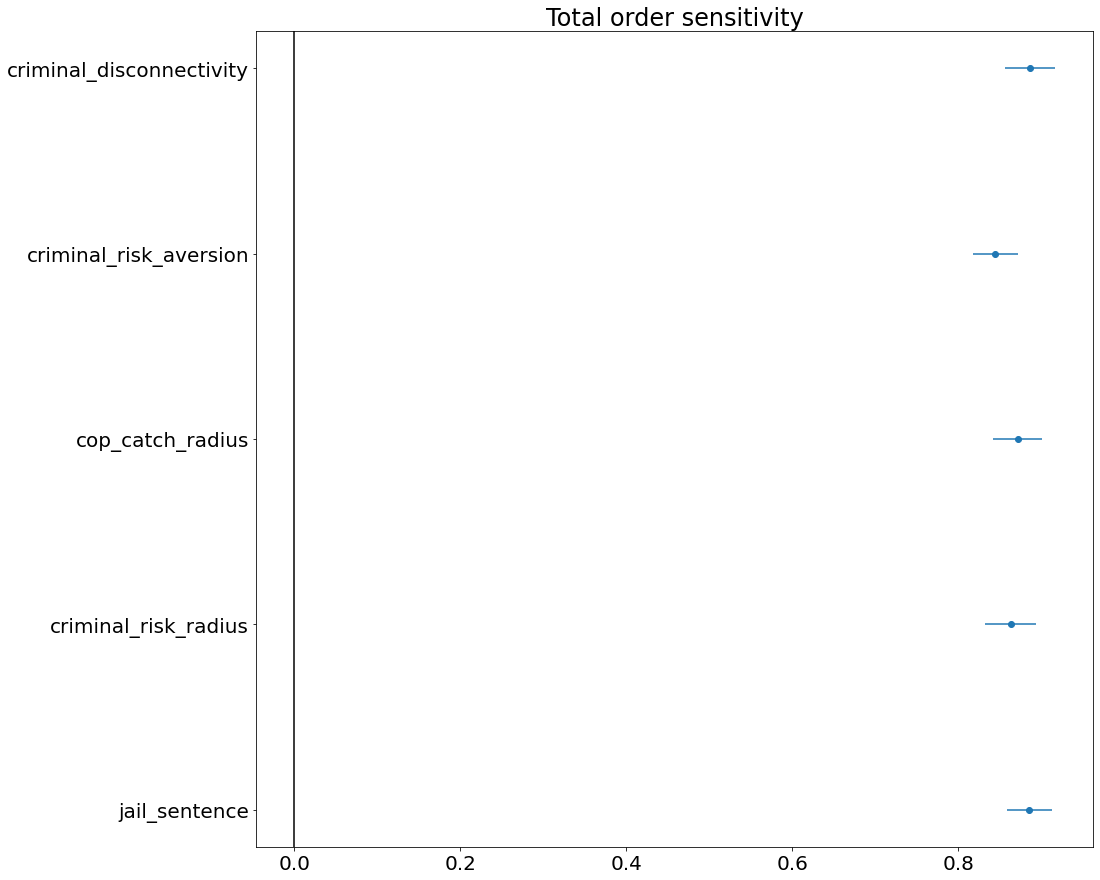

Si_centrum


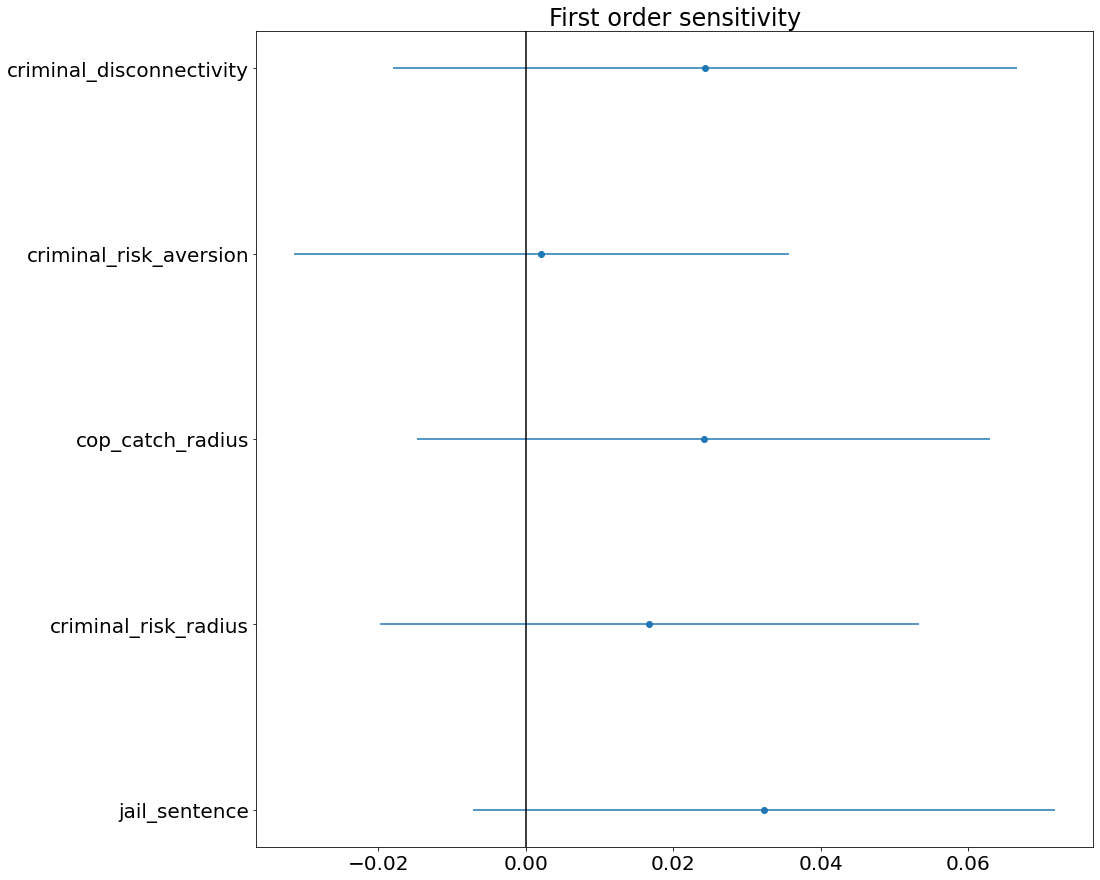

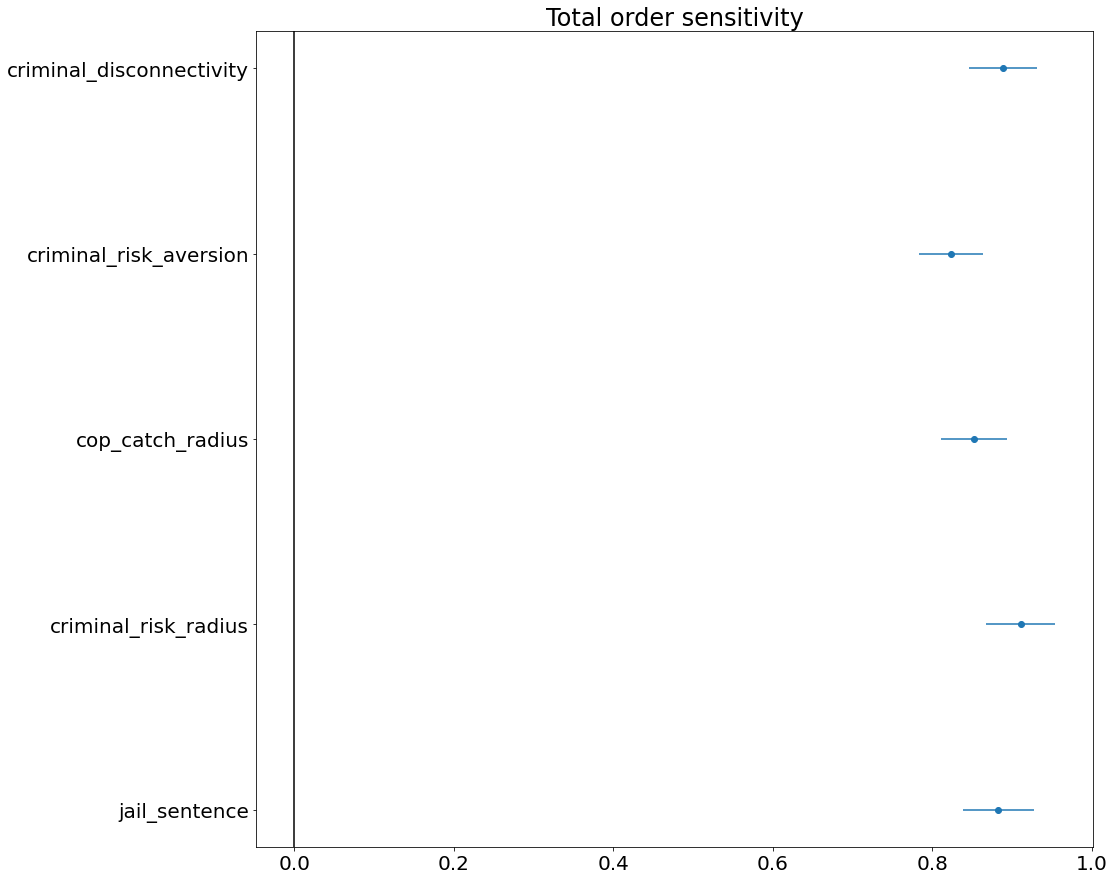

Si_noord


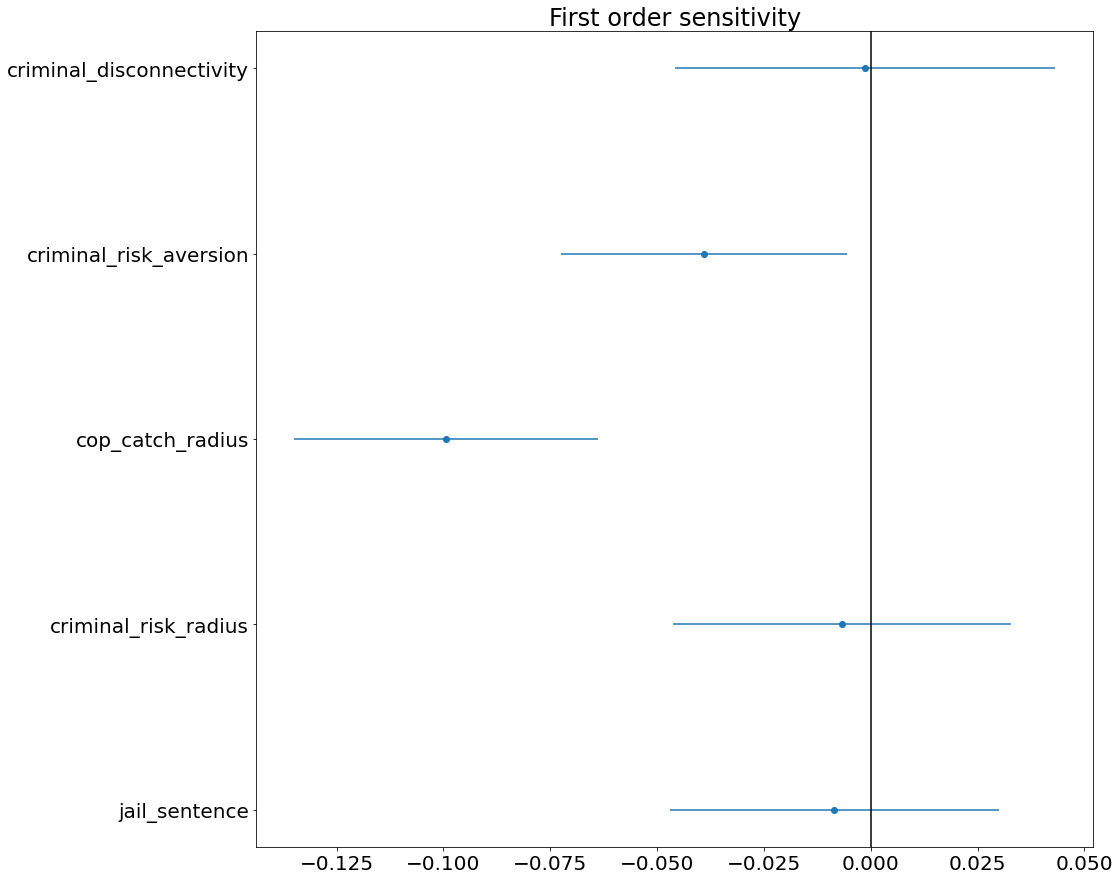

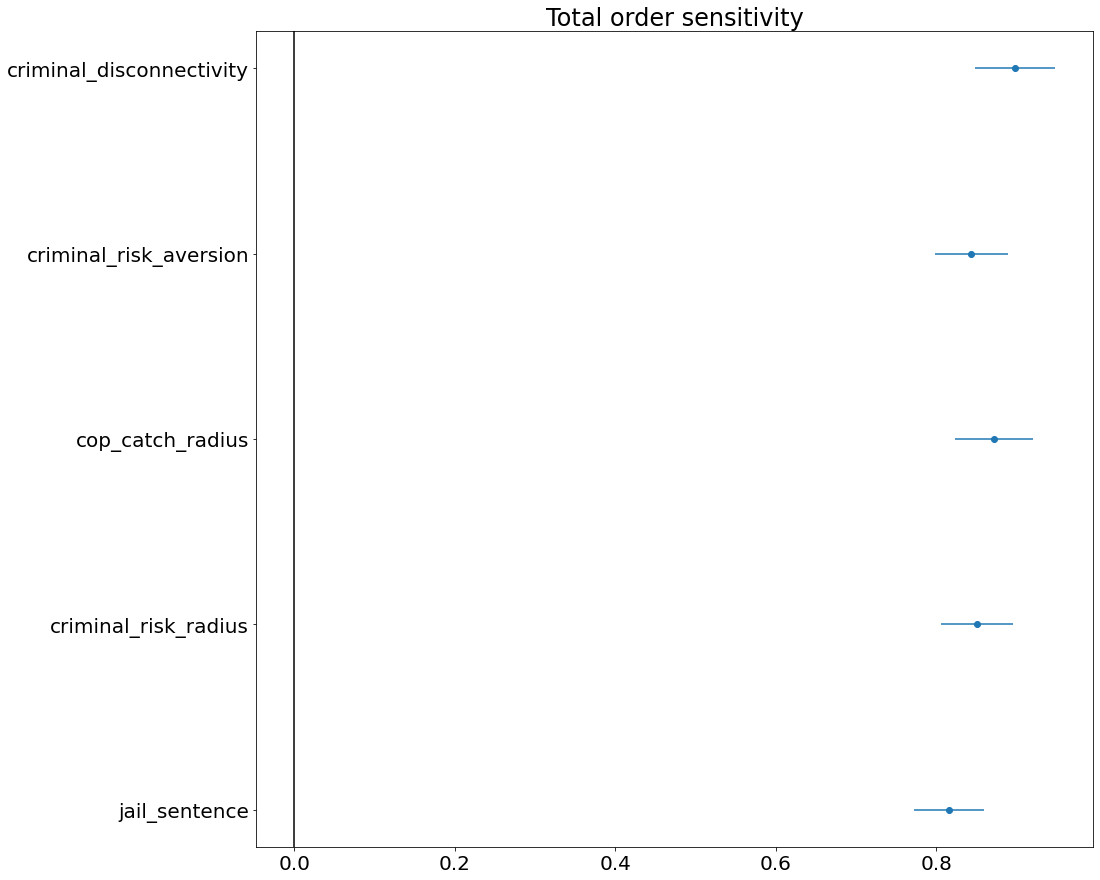

Si_west


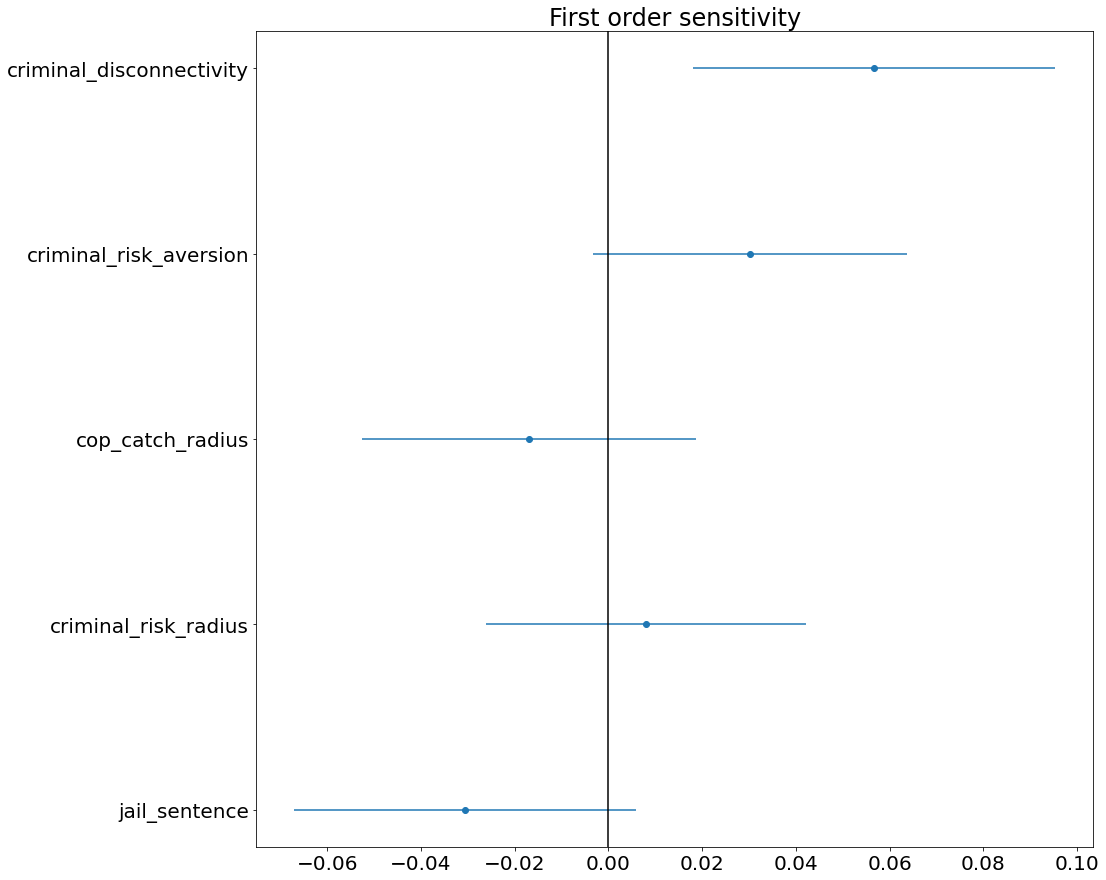

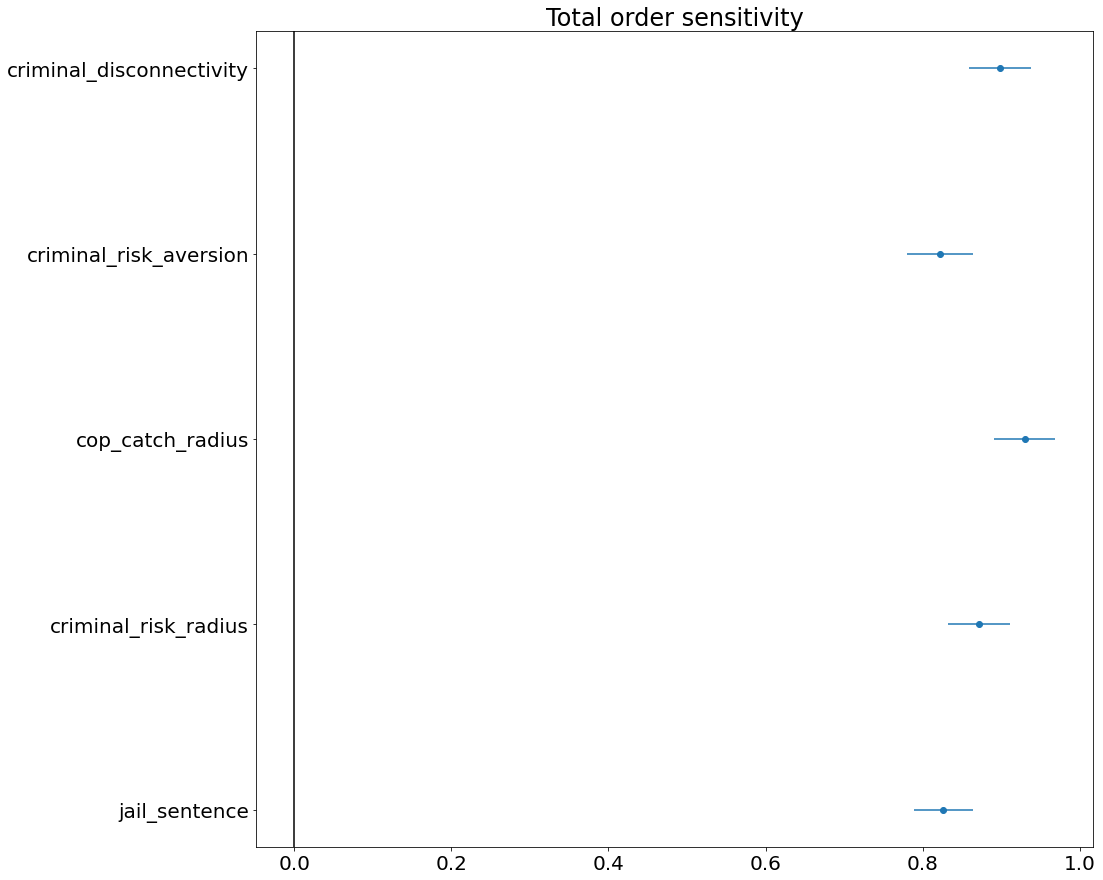

Si_zuid


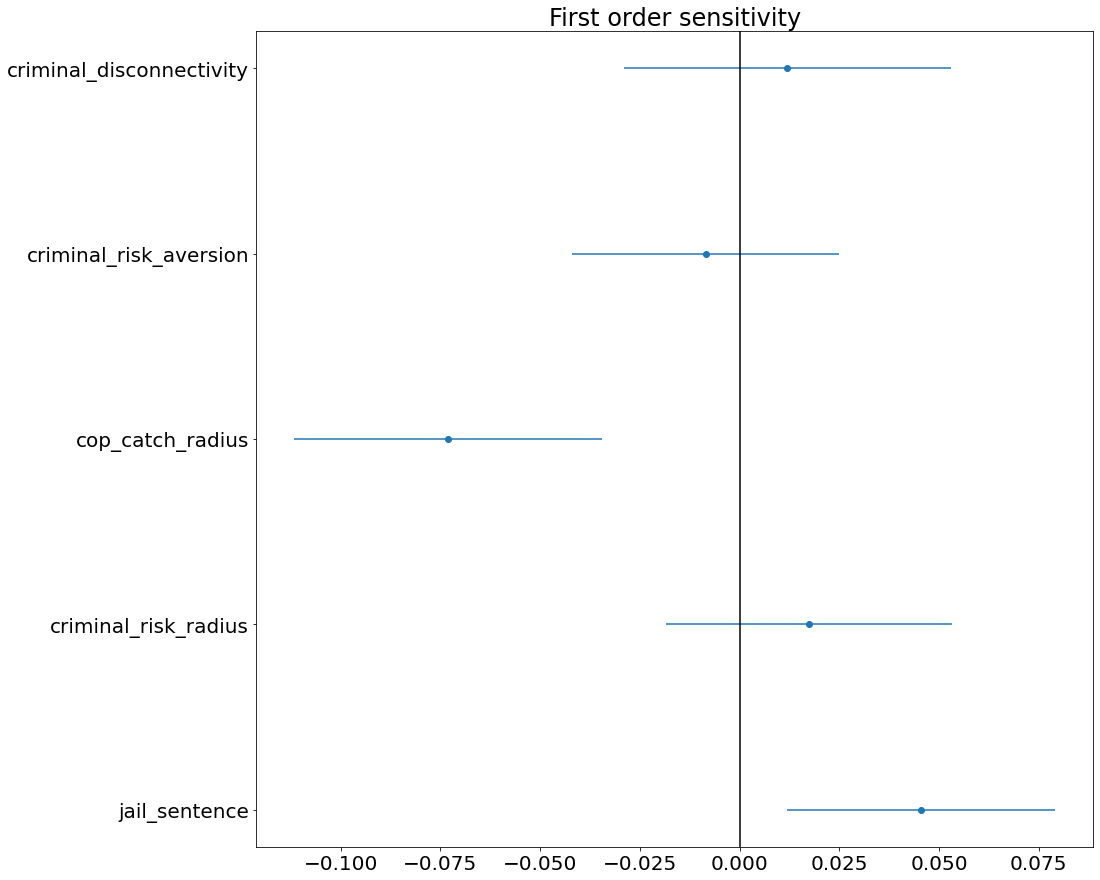

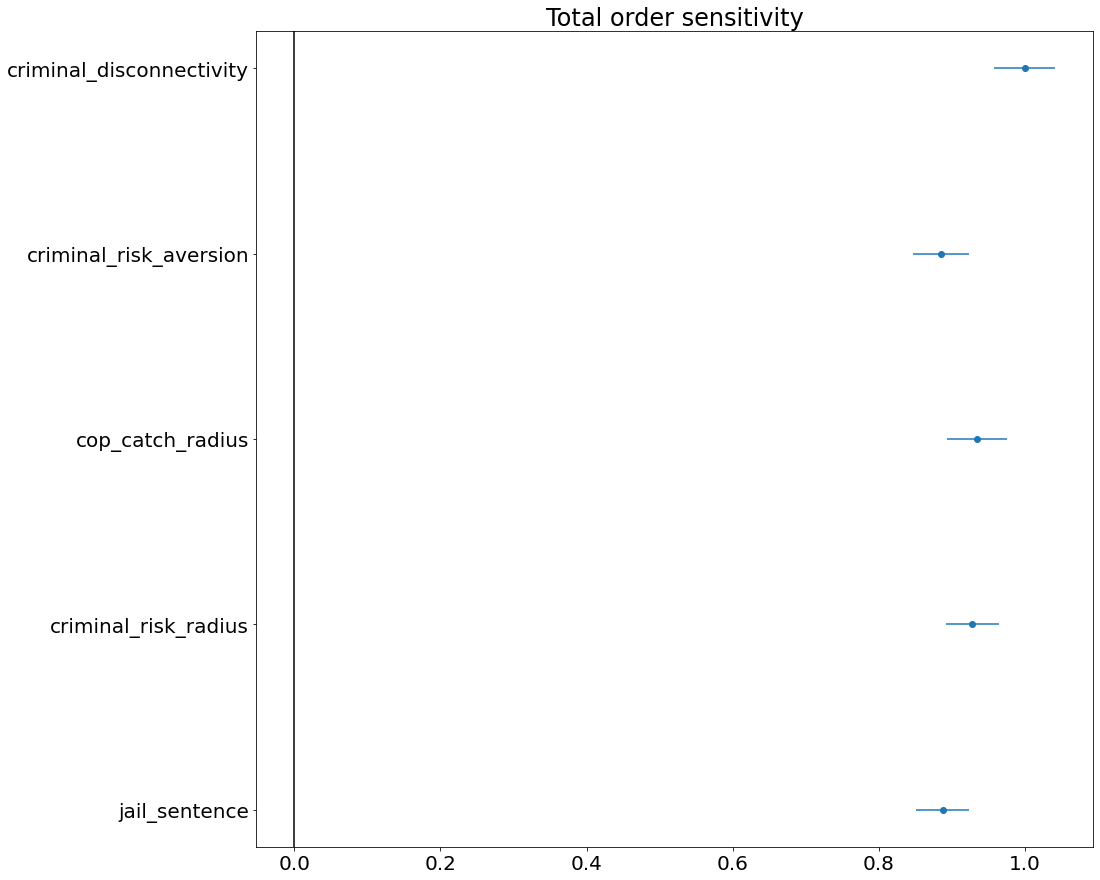

Si_zuidoost


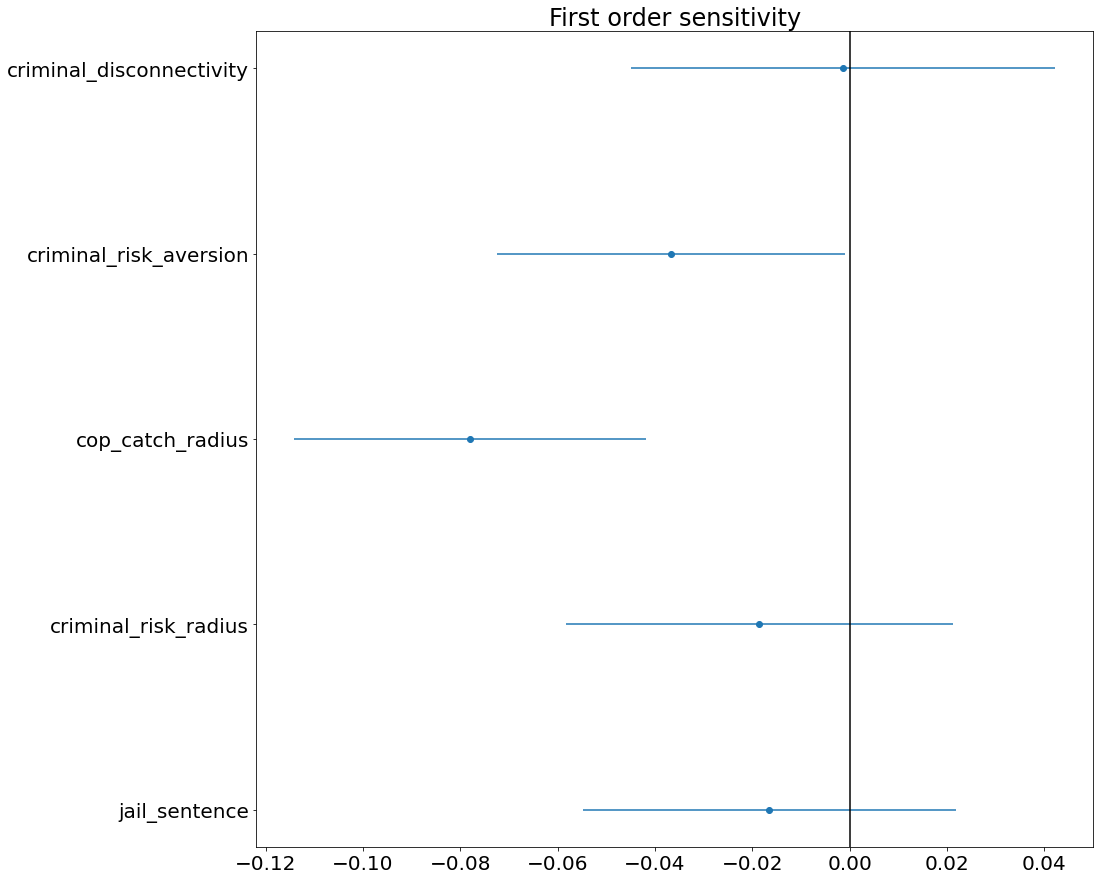

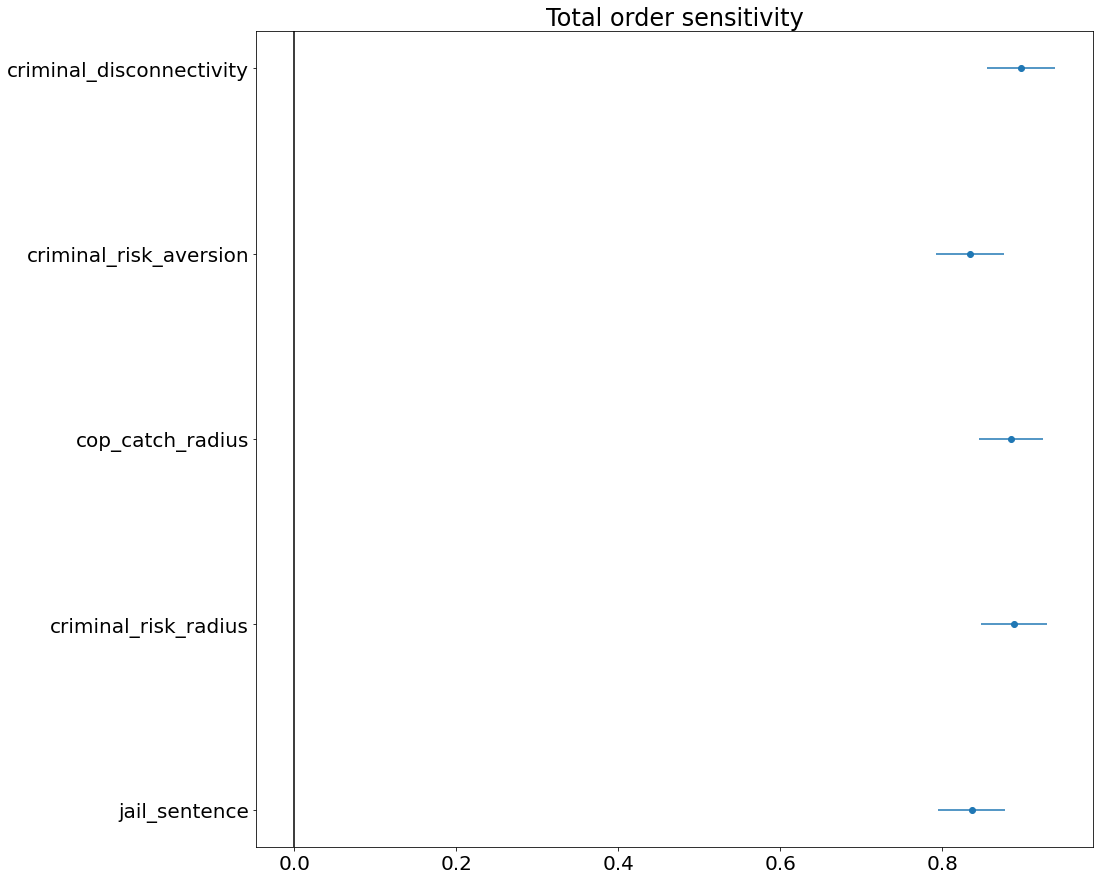

Si_oost


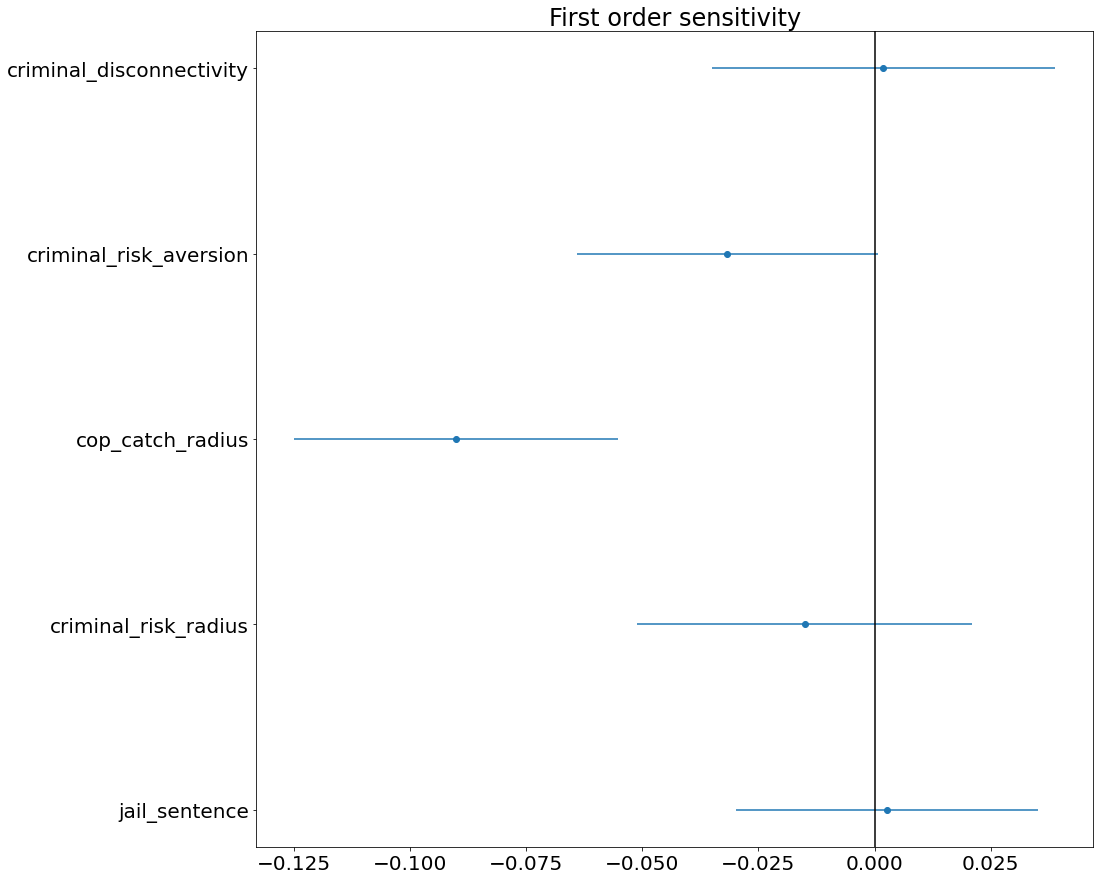

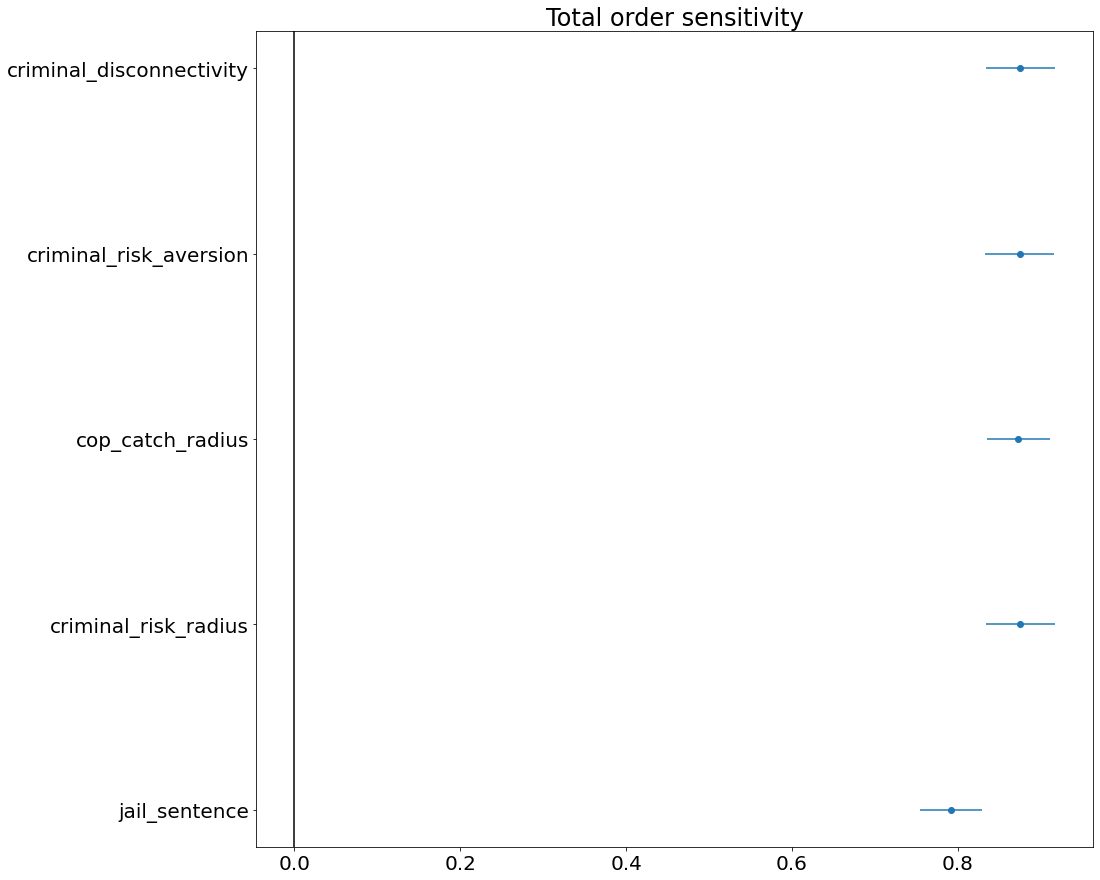

Si_nieuw_west


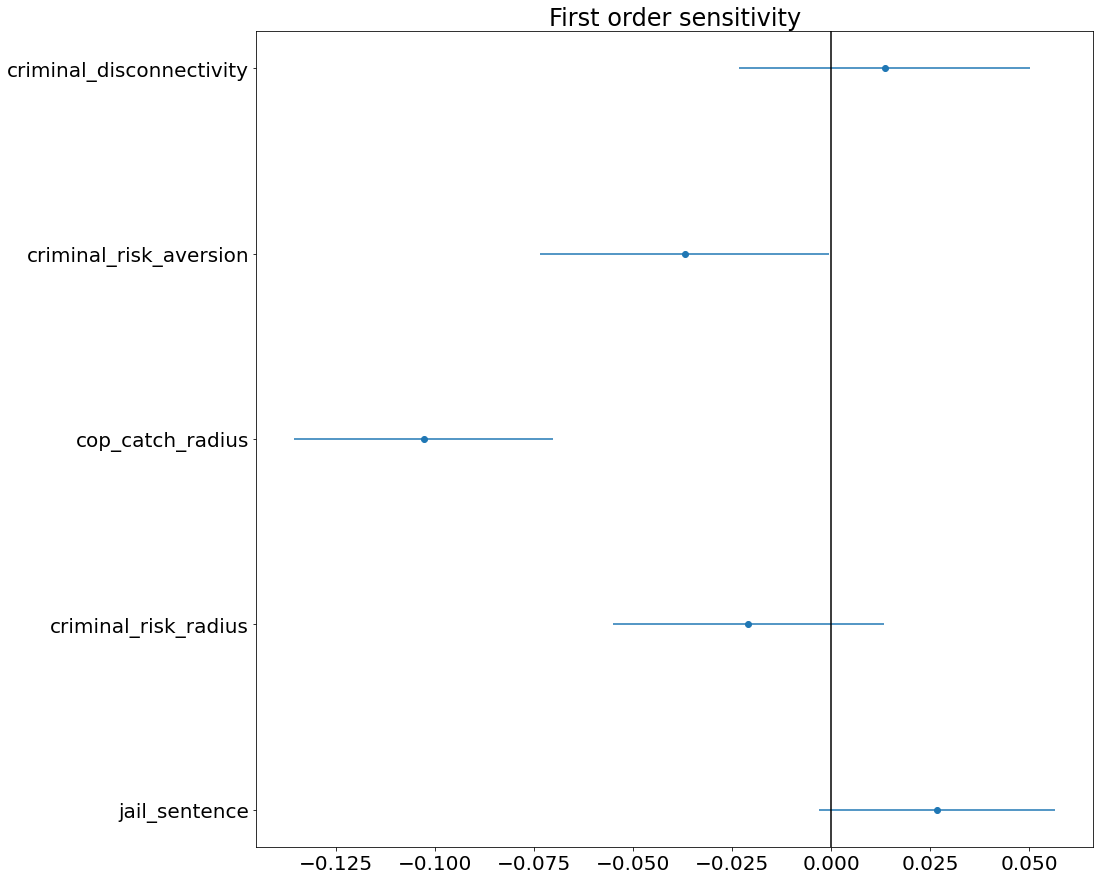

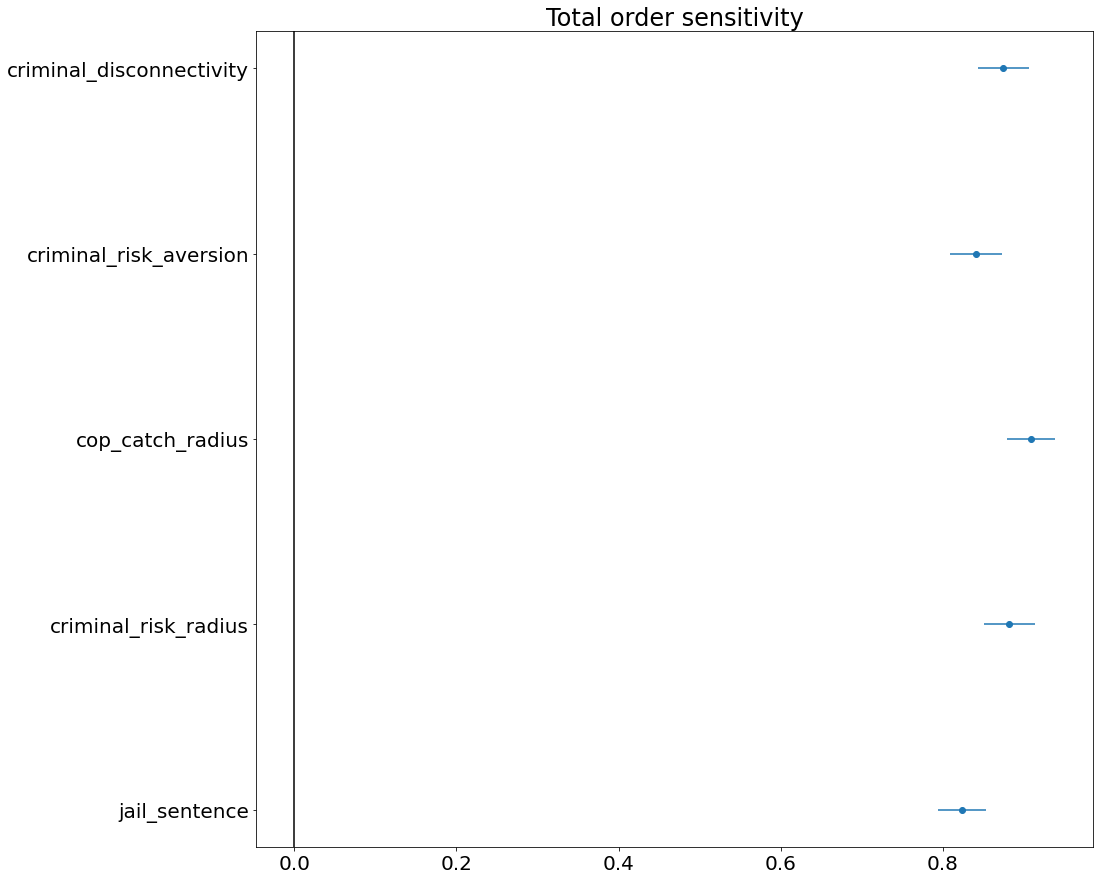

In [19]:
outputs = ['Si_crimes', 'Si_jail', 'Si_centrum', 'Si_noord', 'Si_west', 'Si_zuid', 'Si_zuidoost', 'Si_oost', 'Si_nieuw_west']
counter = 0

for Si in (Si_crimes, Si_jail, Si_centrum, Si_noord, Si_west, Si_zuid, Si_zuidoost, Si_oost, Si_nieuw_west):
    print(outputs[counter])

    # First order
    plot_index(Si, problem['names'], '1', 'First order sensitivity')
    plt.show()

    # # Second order
    # plot_index(Si, problem['names'], '2', 'Second order sensitivity')
    # plt.show()

    # Total order
    plot_index(Si, problem['names'], 'T', 'Total order sensitivity')
    plt.show()

    counter += 1